In [3]:
import cv2 
import numpy as np
import scipy.stats
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal

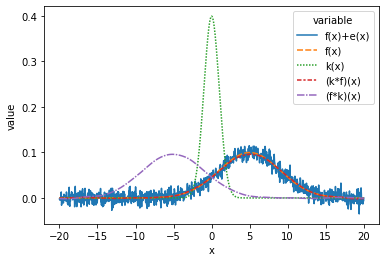

In [75]:
points = 1000
start = -20
end = 20

xfact = (end - start) / points

x = np.linspace(start, end, points)
f_x = scipy.stats.norm(5, 4).pdf(x)

noise = np.random.normal(0, 0.01, x.shape)
f_x_noise = f_x + noise

kernel = scipy.stats.norm(0, 1).pdf(x)

f_x_noise_smooth = np.correlate(f_x_noise, kernel, "same") * xfact
f_x_noise_smooth_inv = np.correlate(kernel, f_x_noise, "same") * xfact

df = pd.DataFrame({})
df['x'] = x
df['f(x)+e(x)'] = f_x_noise
df['f(x)'] = f_x
df['k(x)'] = kernel
df['(k*f)(x)'] = f_x_noise_smooth
df['(f*k)(x)'] = f_x_noise_smooth_inv
df = pd.melt(df, id_vars=['x'], value_vars=['f(x)+e(x)','f(x)', 'k(x)', '(k*f)(x)', '(f*k)(x)'])

sns.lineplot(data=df, x='x', y='value', hue='variable', style='variable')
plt.savefig('../figs/local-filters/correlation-1D-example.png', transparent=True)

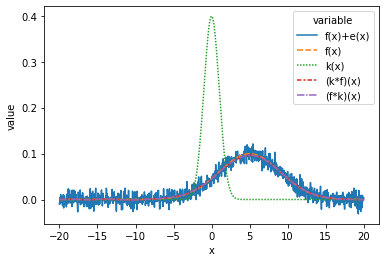

In [76]:
points = 1000
start = -20
end = 20

xfact = (end - start) / points

x = np.linspace(start, end, points)
f_x = scipy.stats.norm(5, 4).pdf(x)

noise = np.random.normal(0, 0.01, x.shape)
f_x_noise = f_x + noise

kernel = scipy.stats.norm(0, 1).pdf(x)

f_x_noise_smooth = np.convolve(f_x_noise, kernel, "same") * xfact
f_x_noise_smooth_inv = np.convolve(kernel, f_x_noise, "same") * xfact

df = pd.DataFrame({})
df['x'] = x
df['f(x)+e(x)'] = f_x_noise
df['f(x)'] = f_x
df['k(x)'] = kernel
df['(k*f)(x)'] = f_x_noise_smooth
df['(f*k)(x)'] = f_x_noise_smooth_inv
df = pd.melt(df, id_vars=['x'], value_vars=['f(x)+e(x)','f(x)', 'k(x)', '(k*f)(x)', '(f*k)(x)'])

sns.lineplot(data=df, x='x', y='value', hue='variable', style='variable')
plt.savefig('../figs/local-filters/convolution-1D-example.png', transparent=True)